In [0]:
import numpy as np
import pandas as pd

fullData = pd.read_csv("https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY")
fullData.head()

,Date,Value
0,2016-04-18,1237.70
1,2016-04-15,1229.75
2,2016-04-14,1240.30
3,2016-04-13,1245.75
4,2016-04-12,1259.20


In [0]:
# Reference - https://www.linkedin.com/pulse/comparison-between-classical-statistical-model-arima-deep-virmani
# https://machinelearningmastery.com/time-series-data-stationary-python/
# Run Dicky Fuller test to check if time series is stationary


from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

  #p-value > 0.05 - Data has unit root and is non-stationary

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


ADF Statistic: -1.539150
p-value: 0.514063
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


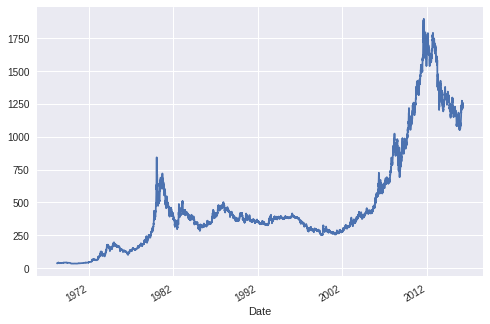

In [0]:
# Show trend/seasonality component
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
series.plot()
pyplot.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


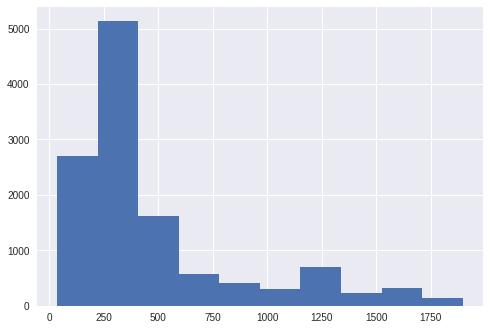

In [0]:
# Summary statistics to compare mean and variance of 2 groups
# Is data normal/gaussian distribution?

from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
series.hist()
pyplot.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


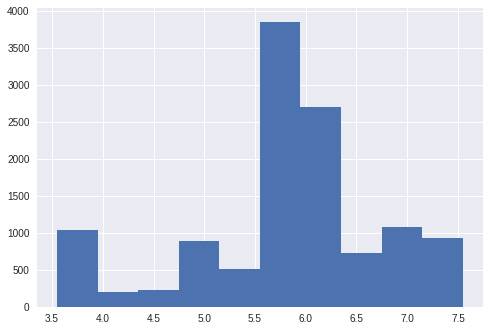

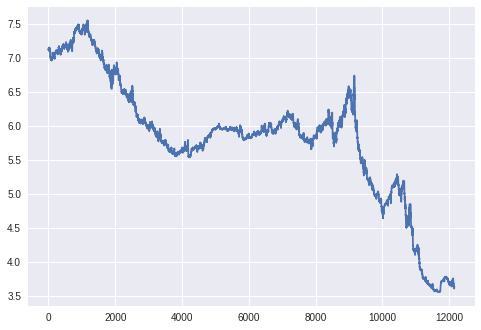

In [0]:
#log transform
from matplotlib import pyplot
from numpy import log
series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [0]:
from matplotlib import pyplot
from numpy import log
series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
X = series.values
X = log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


mean1=6.330236, mean2=5.280856
variance1=0.389527, variance2=0.799497


In [0]:
# without log transform
from pandas import Series
series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


mean1=688.342487, mean2=266.966262
variance1=209475.408748, variance2=27760.862594


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  # Remove the CWD from sys.path while we load stuff.


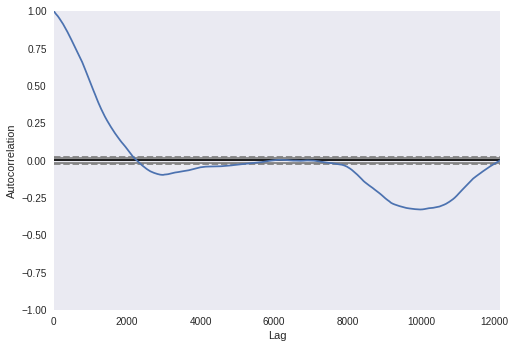

In [0]:


from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot


series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
autocorrelation_plot(series)
pyplot.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                12151
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -42565.396
Method:                       css-mle   S.D. of innovations              8.037
Date:                Fri, 21 Dec 2018   AIC                          85144.791
Time:                        01:45:24   BIC                          85196.628
Sample:                    04-15-2016   HQIC                         85162.169
                         - 04-01-1968                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0987      0.069     -1.440      0.150      -0.233       0.036
ar.L1.D.Value    -0.0405      0.009     -4.463      0.000      -0.058      -0.023
ar.L2.D.Value    -0.0212      0.009     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


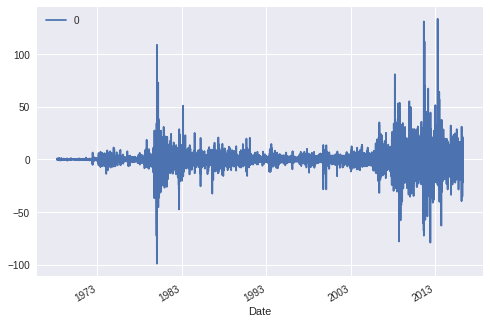

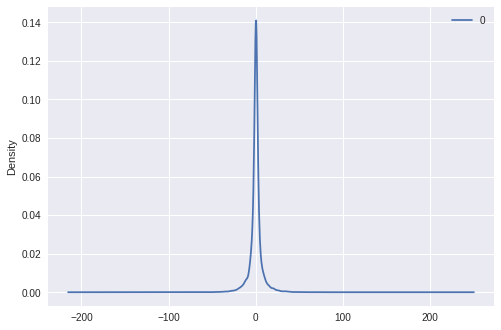

                  0
count  12151.000000
mean      -0.000001
std        8.037669
min      -98.997481
25%       -1.785294
50%        0.094281
75%        1.765744
max      133.657029


In [0]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/k

predicted=337.648321, expected=337.750000
predicted=337.803050, expected=335.250000
predicted=334.924174, expected=346.500000
predicted=346.399584, expected=352.350000
predicted=351.582543, expected=346.250000
predicted=346.370778, expected=347.500000
predicted=347.195300, expected=352.250000
predicted=352.099262, expected=341.600000
predicted=342.081000, expected=339.500000
predicted=339.495443, expected=335.750000
predicted=335.694812, expected=346.000000
predicted=345.895219, expected=332.500000
predicted=332.428678, expected=358.000000
predicted=357.224254, expected=366.000000
predicted=364.744007, expected=370.350000
predicted=370.599690, expected=369.750000
predicted=368.772350, expected=370.450000
predicted=370.878499, expected=375.250000
predicted=375.074675, expected=371.500000
predicted=371.575662, expected=370.300000
predicted=370.297142, expected=369.000000
predicted=368.865712, expected=370.450000
predicted=370.500819, expected=373.000000
predicted=372.679565, expected=370

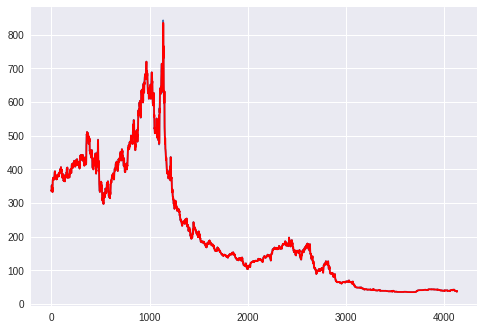

In [0]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 

series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

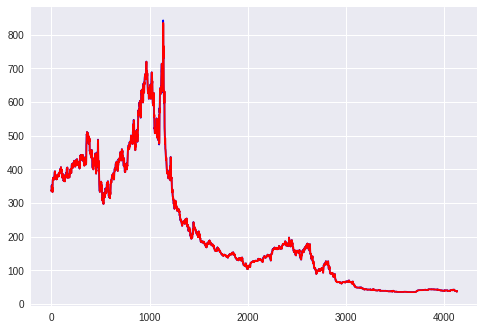

In [0]:
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/k

predicted=337.679281, expected=337.750000
predicted=337.770916, expected=335.250000
predicted=334.940701, expected=346.500000
predicted=346.423374, expected=352.350000
predicted=351.518613, expected=346.250000
predicted=346.427239, expected=347.500000
predicted=347.179692, expected=352.250000
predicted=352.126113, expected=341.600000
predicted=342.011609, expected=339.500000
predicted=339.471365, expected=335.750000
predicted=335.734809, expected=346.000000
predicted=345.885823, expected=332.500000
predicted=332.388853, expected=358.000000
predicted=357.299743, expected=366.000000
predicted=364.733112, expected=370.350000
predicted=370.634581, expected=369.750000
predicted=368.690680, expected=370.450000
predicted=370.996298, expected=375.250000
predicted=374.905015, expected=371.500000
predicted=371.567853, expected=370.300000
predicted=370.272280, expected=369.000000
predicted=368.874224, expected=370.450000
predicted=370.499084, expected=373.000000
predicted=372.647821, expected=370

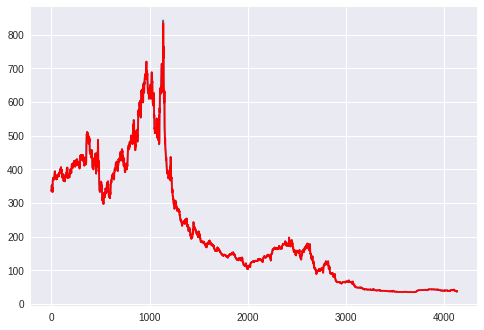

In [0]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import Series
 

series = Series.from_csv('https://www.quandl.com/api/v3/datasets/BUNDESBANK/BBK01_WT5511.csv?api_key=YOUR_API_KEY', header=0)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()